### Filter the relevant columns from the input file

In [ ]:
import pandas as pd

file_path = 'data/wave7.csv'
df = pd.read_csv(file_path)

# Define the variables of interest
variables_of_interest = [
    # Dependent Variables
    'Q207',  # Trust in political parties
    'Q210',  # Confidence in the national government
    'Q211',  # Confidence in the parliament
    'Q213',  # Confidence in judiciary/courts
    'Q214',  # Confidence in the police

    # Independent Variables (Cultural Values)
    'Q57',   # Most people can be trusted
    'Q58',   # Trust in family
    'Q63',   # Trust in people of another religion
    'Q64',   # Trust in people of another nationality
    'Q112',  # Politicians are corrupt
    'Q114',  # Business leaders are corrupt
    'Q164',  # Importance of religion in life
    'Q176',  # Redistribution of wealth is a moral obligation
    'Q198',  # Importance of upholding traditions

    # Control Variables
    'Q260',  # Gender
    'Q261',  # Age
    'Q262',  # Education level
    'Q264',  # Income level
    'Q265',   # Urban or rural residence,
    'B_COUNTRY'   # Country
]

# Filter the dataframe to only include variables of interest
df_filtered = df[variables_of_interest]

# Save the filtered dataset for further analysis (Optional)
df_filtered.to_csv('data/filtered_data.csv', index=False)

# Display the first few rows of the filtered dataset
print("Filtered Data Preview:")
print(df_filtered.head())


C:\Users\raj24\AppData\Local\Temp\ipykernel_15700\2528849517.py:8: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
C:\Users\raj24\AppData\Local\Temp\ipykernel_15700\2528849517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_mapping, inplace=True)


Filtered and Renamed Data Preview:
   Information source: Social media (Facebook, Twitter, etc.)  \
0                                                  5            
1                                                  1            
2                                                  5            
3                                                  5            
4                                                  2            

   Political action: joining in boycotts  \
0                                      3   
1                                      2   
2                                      3   
3                                      2   
4                                      3   

   Political action: attending lawful/peaceful demonstrations  \
0                                                  3            
1                                                  2            
2                                                  1            
3                                                

### **Data Prep**

1. **Handle Missing Data**:
   - Review how missing data is represented (e.g., `-1`, `-2`, `-3`, etc.) in the dataset.
   - Decide on a strategy to handle missing values: imputation, removal, or leaving them as is (depends on proportion and impact).

2. **Explore the Variables**:
   - Perform a descriptive analysis of each variable (e.g., mean, median, frequency distribution).
   - Analyze the scales and data types (ordinal, nominal, or continuous).
   - Recode variables if necessary (e.g., scale transformations).

3. **Visualize Distributions**:
   - Plot histograms or bar charts to explore the distribution of each variable.

C:\Users\raj24\AppData\Local\Temp\ipykernel_19084\2567603673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace(missing_values, pd.NA, inplace=True)


Missing Data Summary:
Q207         3648
Q210         4177
Q211         3079
Q213         2718
Q214         3172
Q57          1337
Q58           332
Q63          4078
Q64          2036
Q112         1645
Q114         7426
Q164         2253
Q176         3391
Q198         3956
Q260           95
Q261         1584
Q262          511
Q264         4681
Q265         4879
B_COUNTRY       0
dtype: int64

Descriptive Statistics:
          B_COUNTRY
count  97220.000000
mean     447.872146
std      256.491312
min       20.000000
25%      218.000000
50%      422.000000
75%      688.000000
max      909.000000


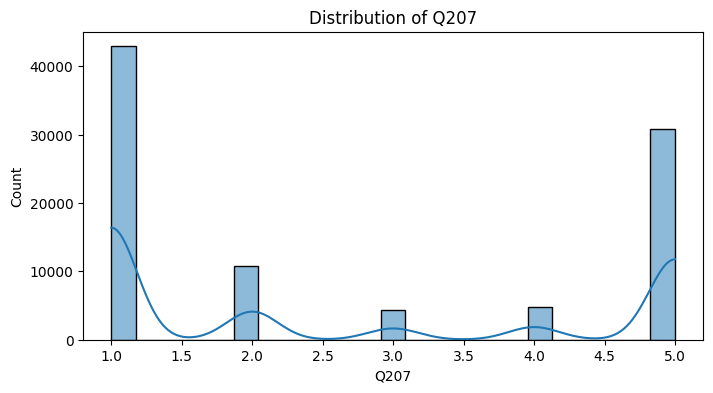

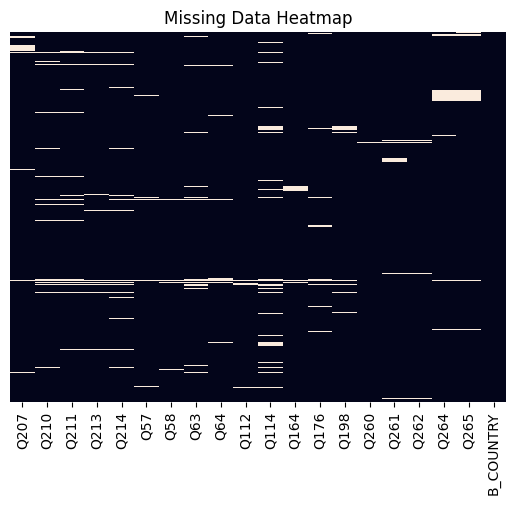

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define missing value codes from WVS documentation (e.g., -1, -2, -3)
missing_values = [-1, -2, -3, -4, -5]

# Replace missing values with NaN for handling in analysis
df_filtered.replace(missing_values, pd.NA, inplace=True)

# Check for missing data summary
missing_summary = df_filtered.isna().sum()
print("Missing Data Summary:")
print(missing_summary)

# Compute descriptive statistics for numerical variables
print("\nDescriptive Statistics:")
print(df_filtered.describe())

# Visualize the distribution of selected variables
def plot_variable_distribution(df, variable, kind="hist"):
    plt.figure(figsize=(8, 4))
    if kind == "hist":
        sns.histplot(df[variable].dropna(), kde=True)
    elif kind == "bar":
        sns.countplot(x=variable, data=df, order=df[variable].value_counts().index)
    plt.title(f"Distribution of {variable}")
    plt.show()

# Example: Plot distribution for Trust in Political Parties (Q207)
plot_variable_distribution(df_filtered, "Q207", kind="hist")

# Visualize missing data distribution (optional)
sns.heatmap(df_filtered.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


### Handling Missing Data

In [4]:
# Generate a summary of all variables in the filtered dataset
import pandas as pd

# Load the dataset
file_path = 'data/filtered_data.csv'
df_filtered = pd.read_csv(file_path)

# Replace predefined missing value codes with numpy.nan
missing_values = [-1, -2, -3, -4, -5]
df_filtered.replace(missing_values, pd.NA, inplace=True)

# Initialize a dictionary to store the summary
summary = []

# Iterate through all columns to generate the summary
for column in df_filtered.columns:
    data_type = df_filtered[column].dtype
    unique_values = df_filtered[column].dropna().unique()[:10]  # Show only first 10 unique values for brevity
    num_unique = df_filtered[column].nunique(dropna=True)
    num_missing = df_filtered[column].isna().sum()
    
    # Add variable details to the summary
    summary.append({
        "Variable": column,
        "Type": data_type,
        "Number of Unique Values": num_unique,
        "Unique Values (Sample)": unique_values,
        "Number of Missing Values": num_missing
    })

# Convert summary to a DataFrame
summary_df = pd.DataFrame(summary)

# Save the summary to a file
summary_file = 'data/wave7_filtered_data_summary.csv'
summary_df.to_csv(summary_file, index=False)
print(f"Variable summary saved to '{summary_file}'.")

# Display the first few rows of the summary for verification
print(summary_df.head())


Variable summary saved to 'data/wave7_filtered_data_summary.csv'.
  Variable    Type  Number of Unique Values Unique Values (Sample)  \
0     Q207  object                        5        [5, 1, 2, 4, 3]   
1     Q210  object                        3              [3, 2, 1]   
2     Q211  object                        3              [3, 2, 1]   
3     Q213  object                        3              [3, 1, 2]   
4     Q214  object                        3              [3, 2, 1]   

   Number of Missing Values  
0                      3648  
1                      4177  
2                      3079  
3                      2718  
4                      3172  


In [5]:
# Define the categorized variables
ordinal_vars = ['Q207', 'Q210', 'Q211', 'Q213', 'Q214', 'Q112', 'Q114', 'Q164', 'Q176']
binary_vars = ['Q57', 'Q260', 'Q264', 'Q265']
multinomial_vars = ['Q58', 'Q63', 'Q64', 'Q198']
numeric_vars = ['Q261', 'Q262']

# Identify remaining variables not yet handled
remaining_vars = list(set(df_filtered.columns) - set(ordinal_vars + binary_vars + multinomial_vars + numeric_vars))
print(f"Remaining Variables: {remaining_vars}")

# Step 1: Categorize remaining variables
# Inspect these manually to decide their type (numeric or categorical)
# Example: Assume remaining variables are numeric for demonstration
remaining_numeric_vars = remaining_vars  # Adjust this list after inspection if needed

# Step 2: Impute remaining numeric variables using median
if remaining_numeric_vars:
    remaining_numeric_imputer = SimpleImputer(strategy="median")
    df_filtered[remaining_numeric_vars] = remaining_numeric_imputer.fit_transform(df_filtered[remaining_numeric_vars])

# Recheck missing values in the dataset
print("\nMissing Values After Handling All Variables:")
print(df_filtered.isna().sum())


Remaining Variables: ['B_COUNTRY']


NameError: name 'SimpleImputer' is not defined

In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
file_path = 'data/filtered_data.csv'
df_filtered = pd.read_csv(file_path)

# Replace predefined missing value codes with numpy.nan
missing_values = [-1, -2, -3, -4, -5]
df_filtered.replace(missing_values, np.nan, inplace=True)

# Step 1: Convert variables to appropriate types
# Define lists of variables by type
ordinal_vars = ['Q207', 'Q210', 'Q211', 'Q213', 'Q214', 'Q112', 'Q114', 'Q164', 'Q176']
binary_vars = ['Q57', 'Q260', 'Q264', 'Q265']
multinomial_vars = ['Q58', 'Q63', 'Q64', 'Q198']
numeric_vars = ['Q261', 'Q262']

# Convert ordinal and numeric variables to float
df_filtered[ordinal_vars + numeric_vars] = df_filtered[ordinal_vars + numeric_vars].astype(float)

# Convert binary and multinomial variables to category
df_filtered[binary_vars + multinomial_vars] = df_filtered[binary_vars + multinomial_vars].astype('category')

# Step 2: Handle missing data
# Impute ordinal variables using median
ordinal_imputer = SimpleImputer(strategy="median")
df_filtered[ordinal_vars] = ordinal_imputer.fit_transform(df_filtered[ordinal_vars])

# Impute binary and multinomial variables using mode
categorical_vars = binary_vars + multinomial_vars
categorical_imputer = SimpleImputer(strategy="most_frequent")
df_filtered[categorical_vars] = categorical_imputer.fit_transform(df_filtered[categorical_vars])

# Impute numeric variables using median
numeric_imputer = SimpleImputer(strategy="median")
df_filtered[numeric_vars] = numeric_imputer.fit_transform(df_filtered[numeric_vars])

# Check for remaining missing values
print("\nRemaining Missing Values After Imputation:")
print(df_filtered.isna().sum())

# Step 1: Define a mapping for variable names
rename_mapping = {
    'Q207': 'Trust_in_Political_Parties',
    'Q210': 'Confidence_in_Government',
    'Q211': 'Confidence_in_Parliament',
    'Q213': 'Confidence_in_Judiciary',
    'Q214': 'Confidence_in_Police',
    'Q57': 'Social_Trust',
    'Q58': 'Trust_in_Family',
    'Q63': 'Trust_in_Other_Religions',
    'Q64': 'Trust_in_Other_Nationalities',
    'Q112': 'Perceived_Political_Corruption',
    'Q114': 'Perceived_Business_Corruption',
    'Q164': 'Importance_of_Religion',
    'Q176': 'Redistribution_as_Moral',
    'Q198': 'Importance_of_Tradition',
    'Q260': 'Gender',
    'Q261': 'Year_of_Birth',
    'Q262': 'Age',
    'Q264': 'Urban_vs_Rural',
    'Q265': 'Residence_Type',
    'B_COUNTRY': 'Country'
}

# Step 2: Rename the columns
df_filtered.rename(columns=rename_mapping, inplace=True)


# Save the cleaned dataset
cleaned_file_path = 'data/final_cleaned_wave7_data.csv'
df_filtered.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved as '{cleaned_file_path}'.")


Remaining Missing Values After Imputation:
Q207         0
Q210         0
Q211         0
Q213         0
Q214         0
Q57          0
Q58          0
Q63          0
Q64          0
Q112         0
Q114         0
Q164         0
Q176         0
Q198         0
Q260         0
Q261         0
Q262         0
Q264         0
Q265         0
B_COUNTRY    0
dtype: int64

Cleaned dataset saved as 'data/final_cleaned_wave7_data.csv'.



Summary Statistics:
               Q207          Q210          Q211          Q213          Q214  \
count  97220.000000  97220.000000  97220.000000  97220.000000  97220.000000   
mean       2.652139      2.554392      2.377340      2.075098      2.293304   
std        1.762888      0.648133      0.718527      0.821984      0.732078   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      2.000000      2.000000      1.000000      2.000000   
50%        2.000000      3.000000      3.000000      2.000000      2.000000   
75%        5.000000      3.000000      3.000000      3.000000      3.000000   
max        5.000000      3.000000      3.000000      3.000000      3.000000   

                Q57           Q58           Q63           Q64          Q112  \
count  97220.000000  97220.000000  97220.000000  97220.000000  97220.000000   
mean       1.760677      1.271981      2.756552      2.189549      7.604598   
std        0.426673      0.564

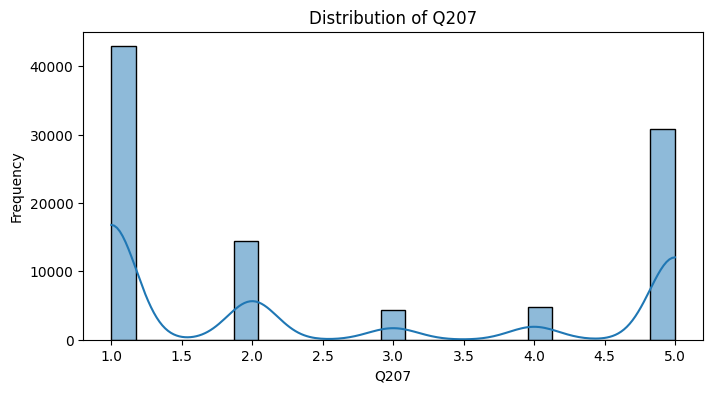

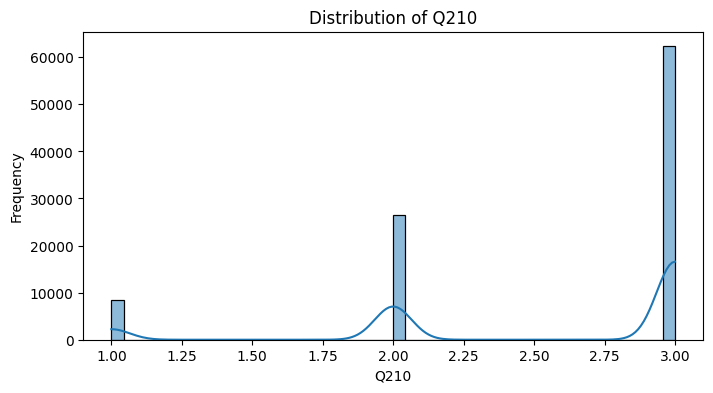

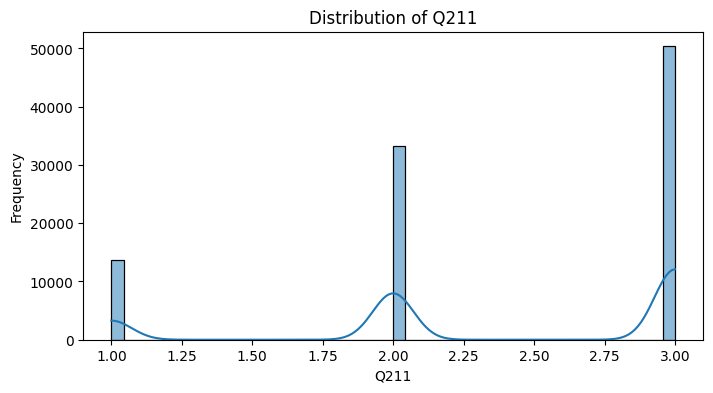

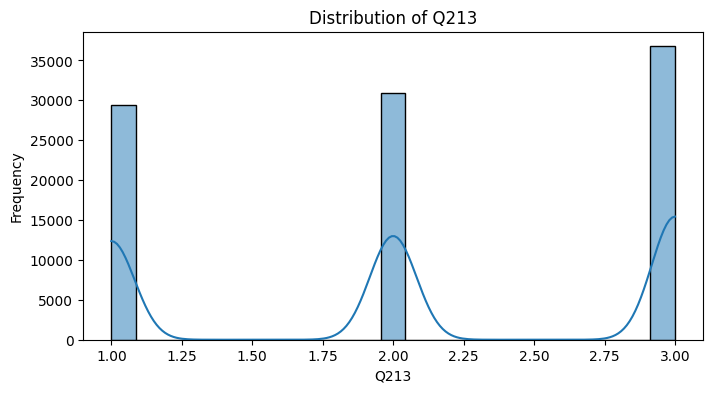

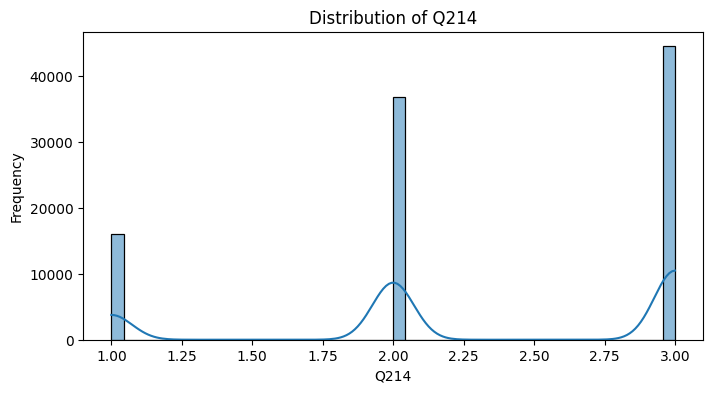

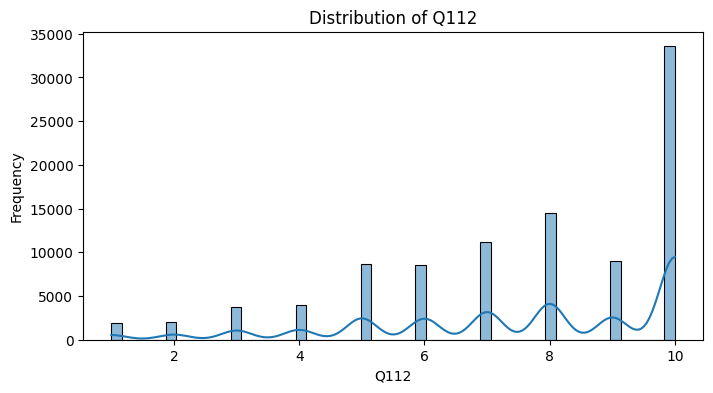

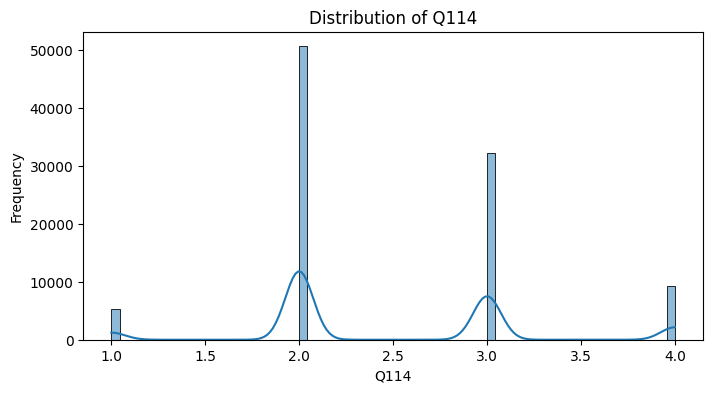

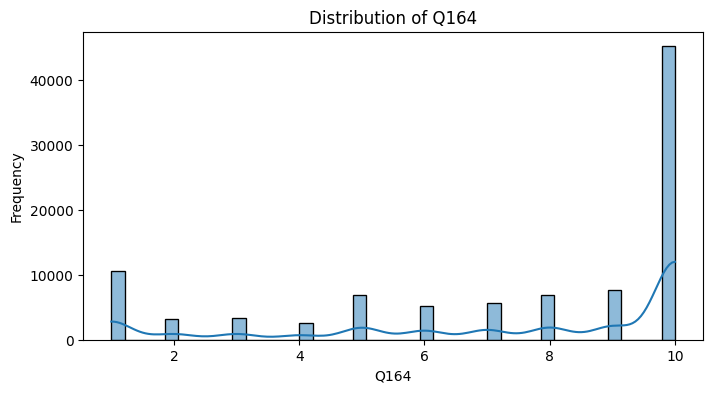

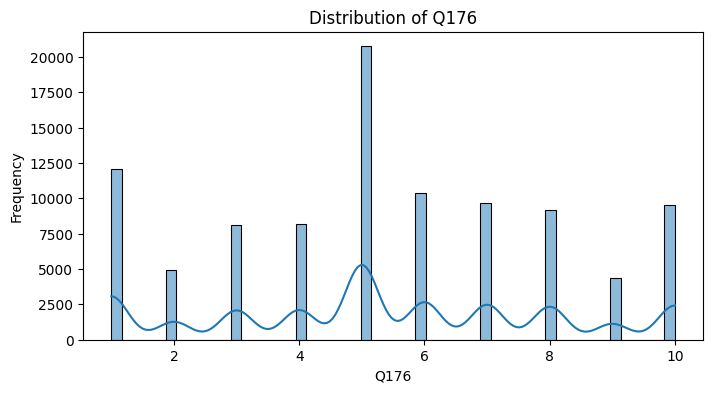

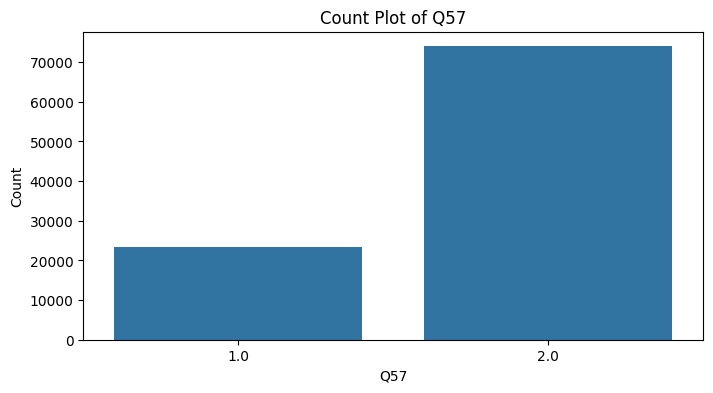

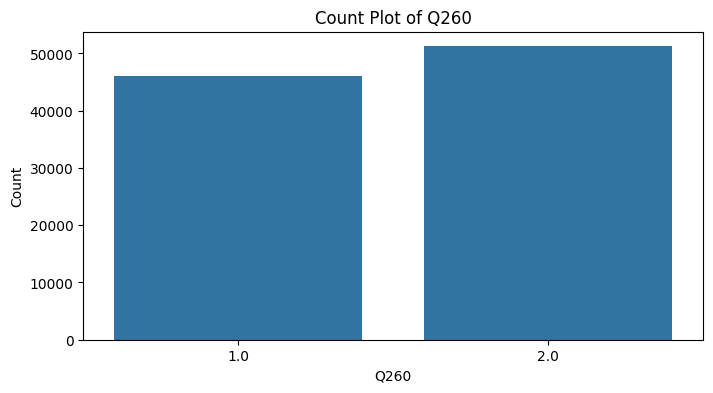

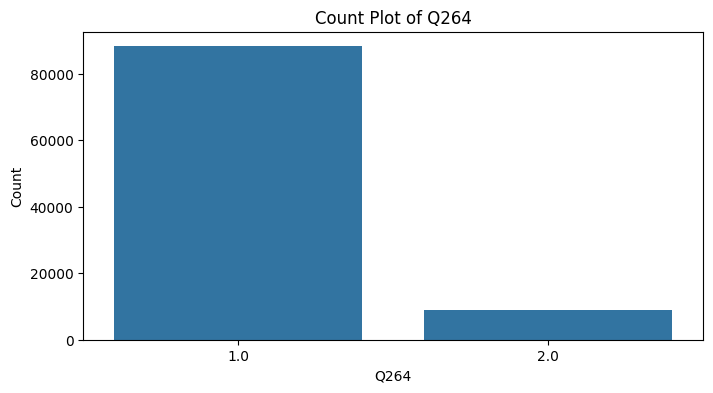

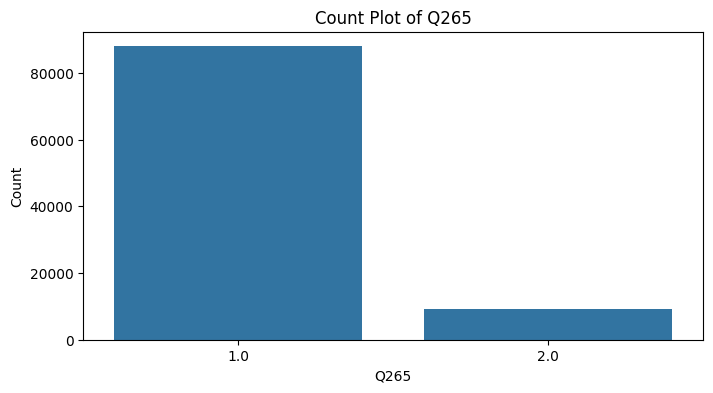

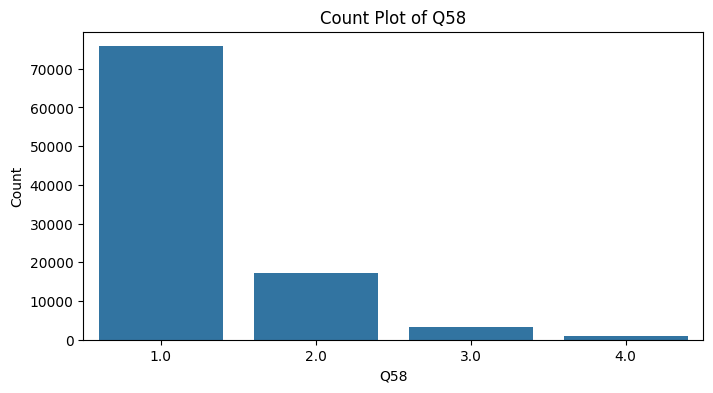

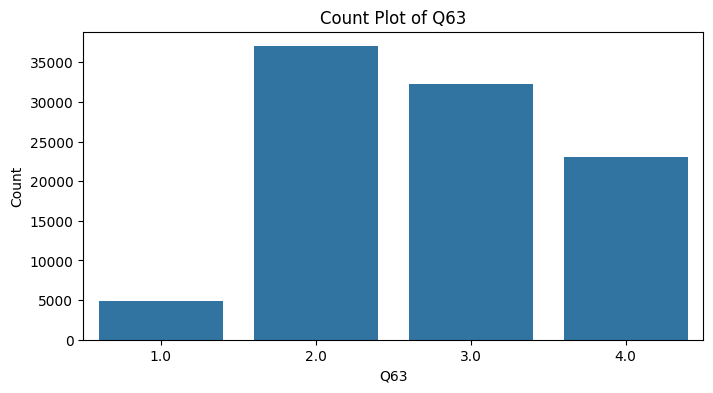

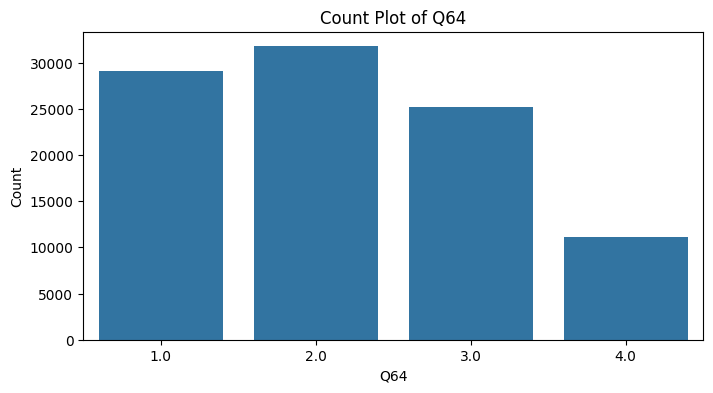

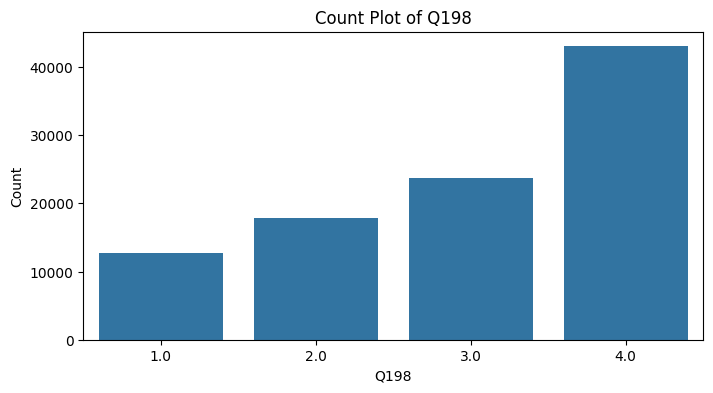

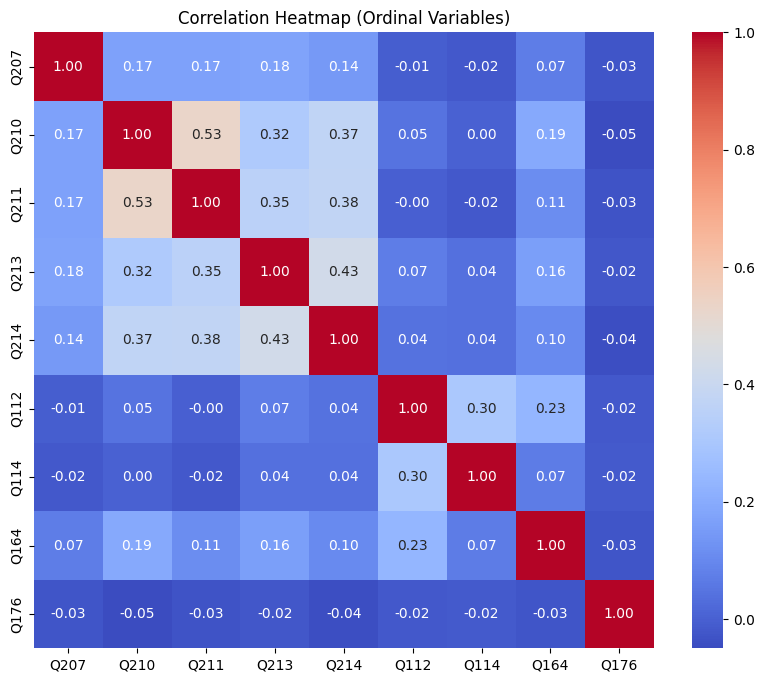

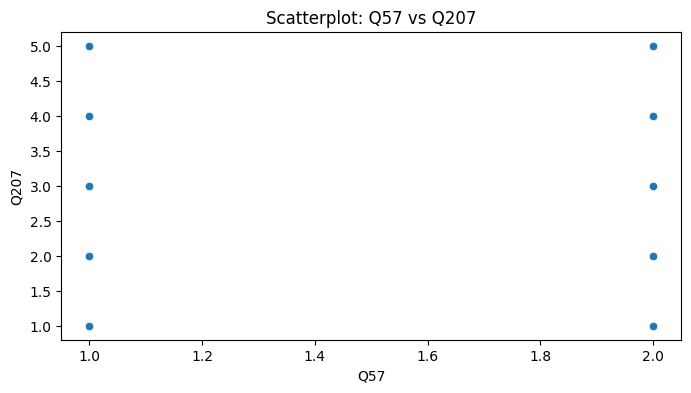

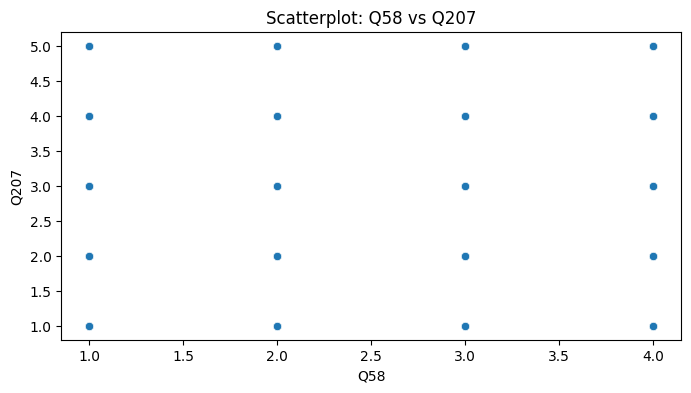

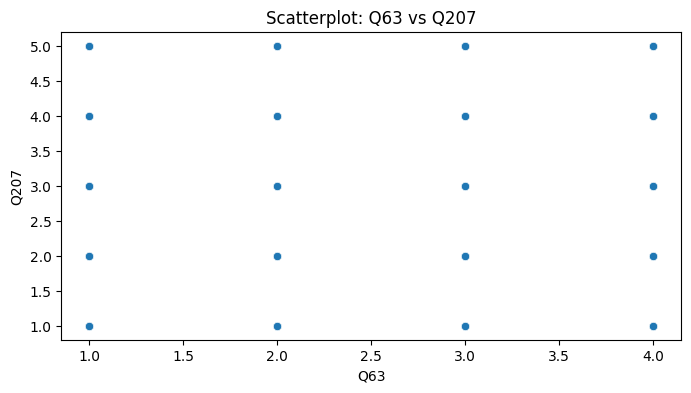

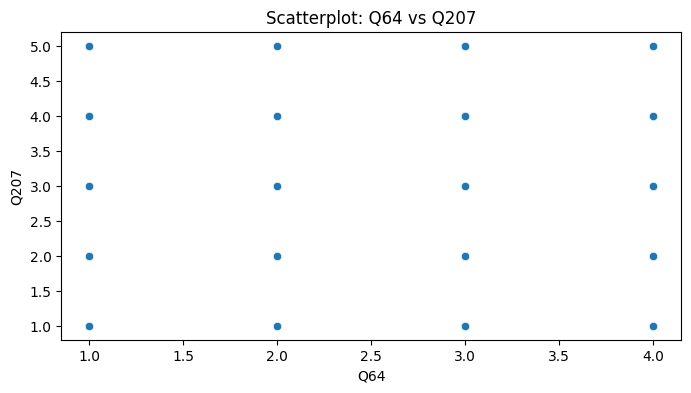

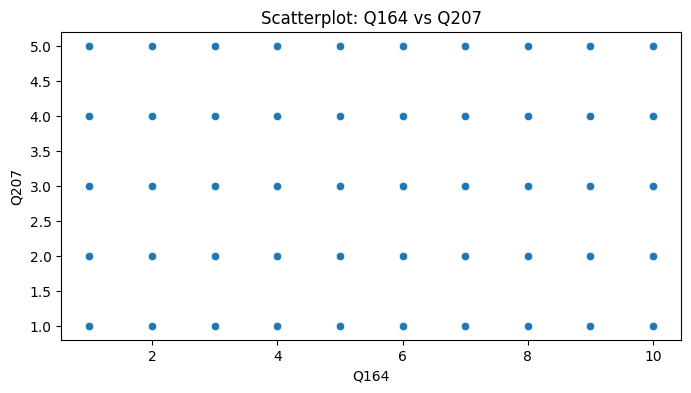

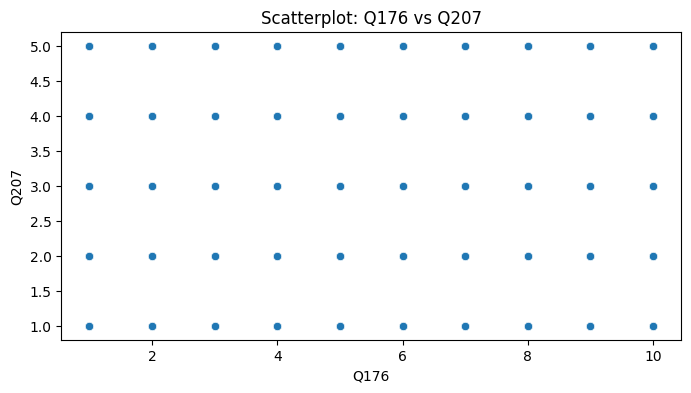

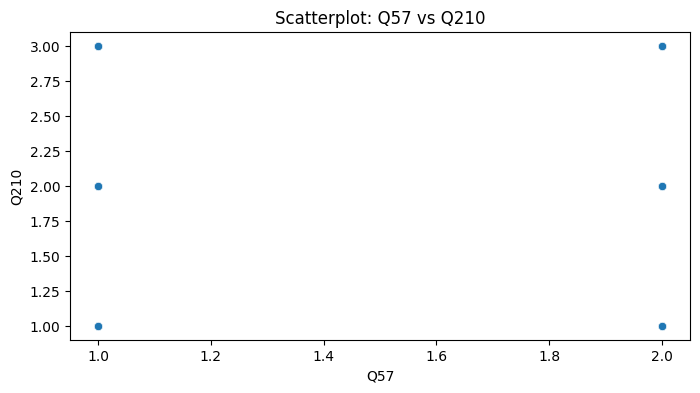

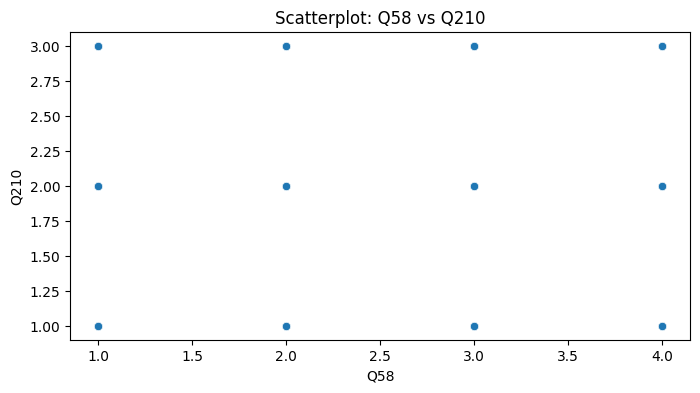

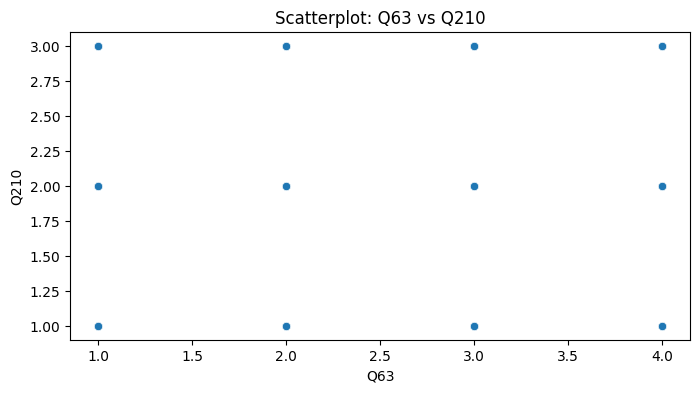

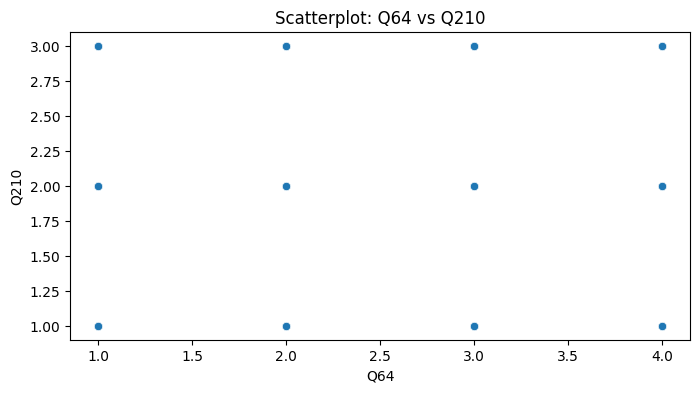

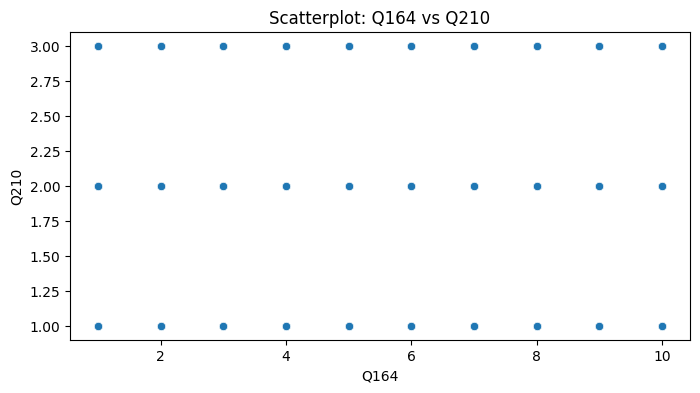

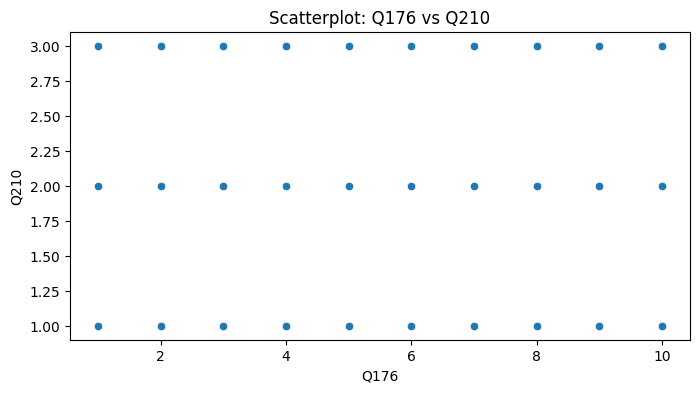

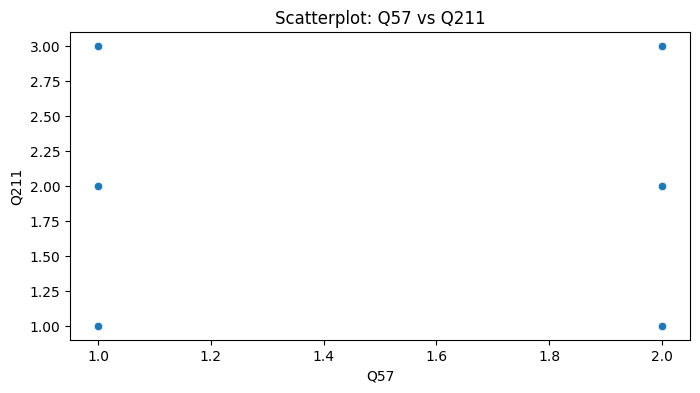

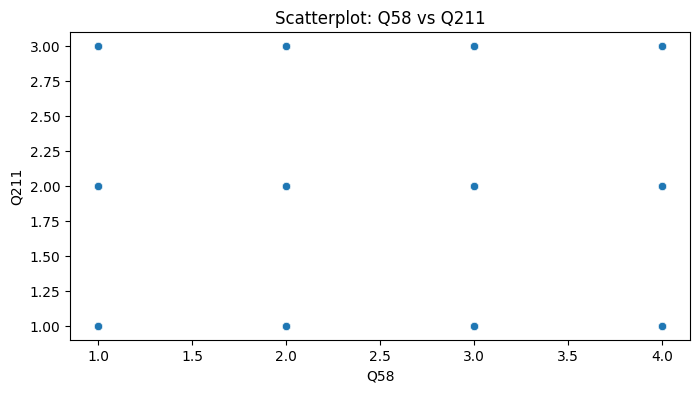

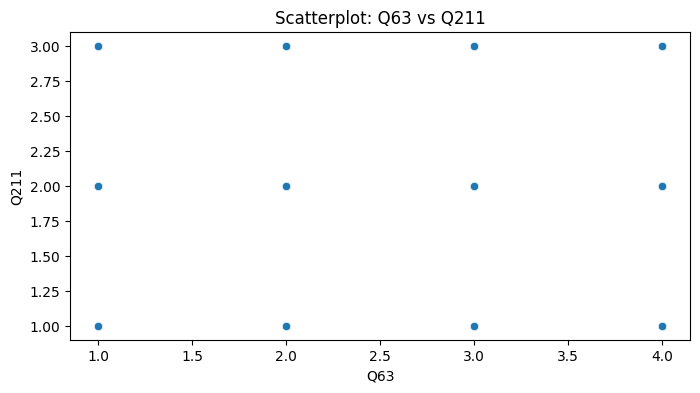

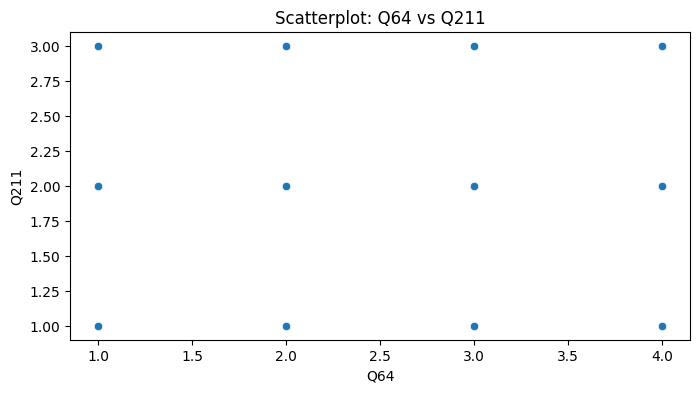

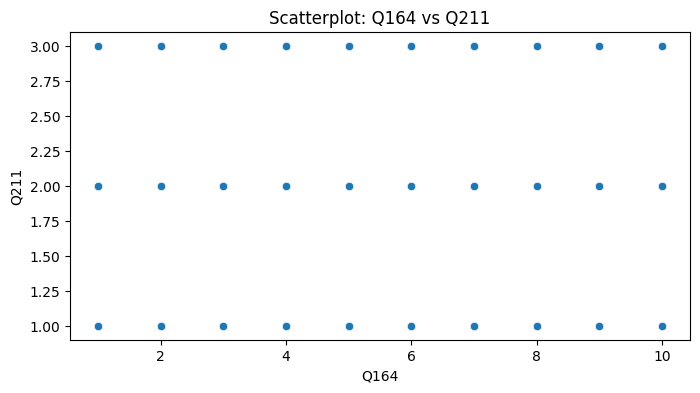

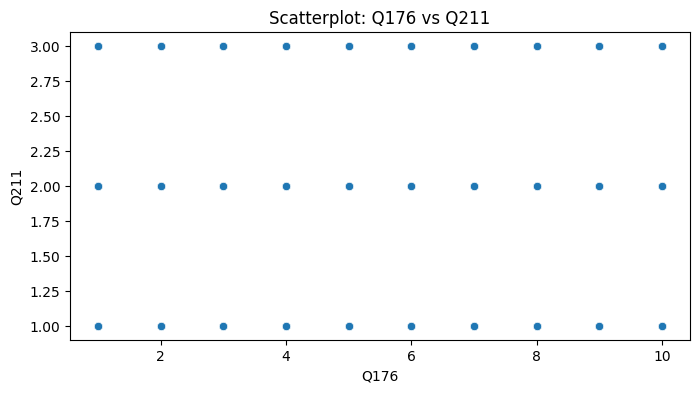

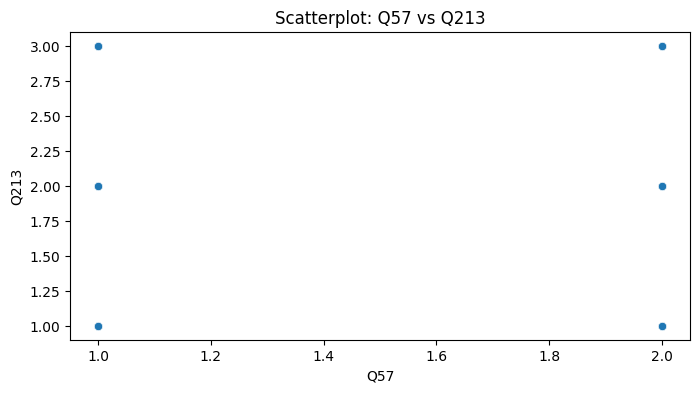

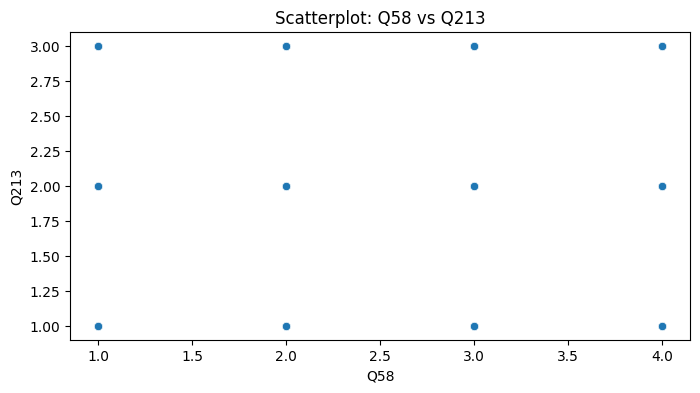

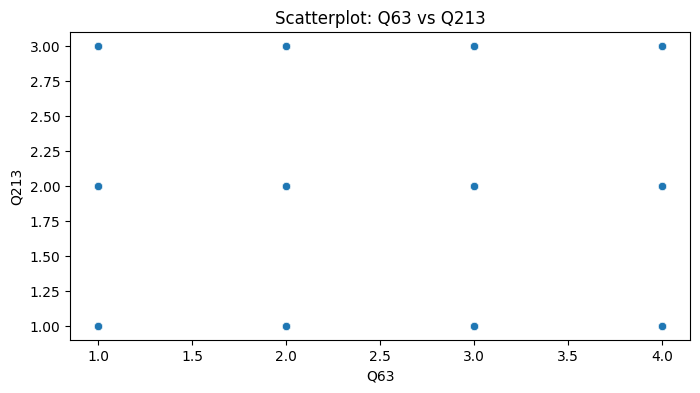

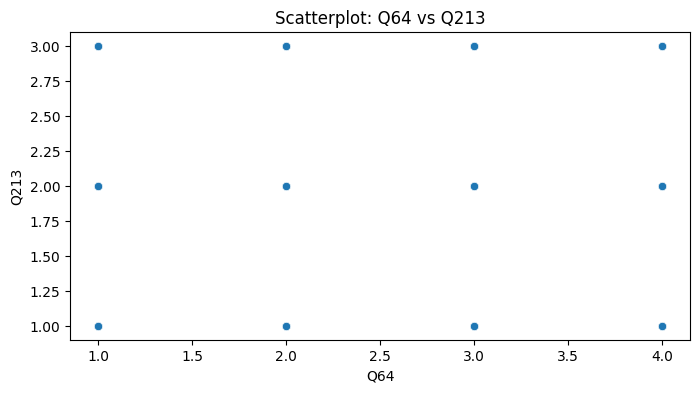

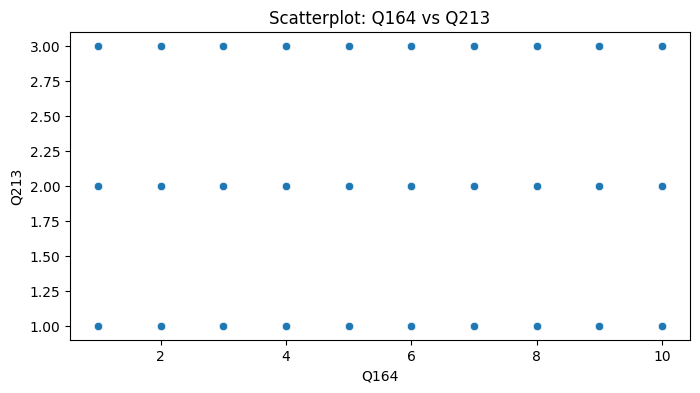

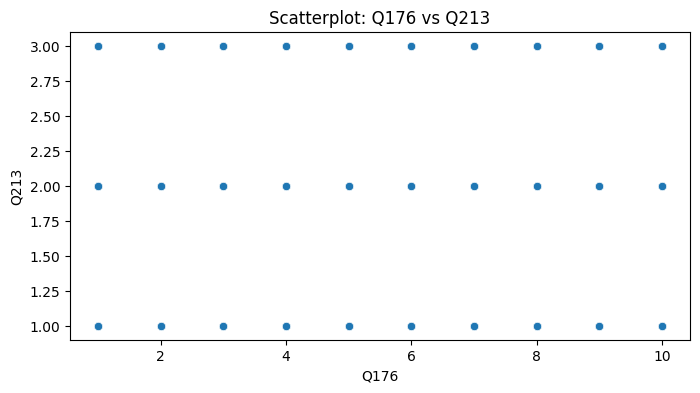

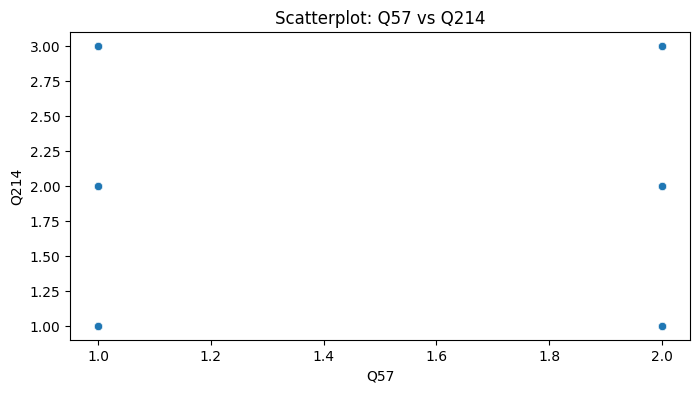

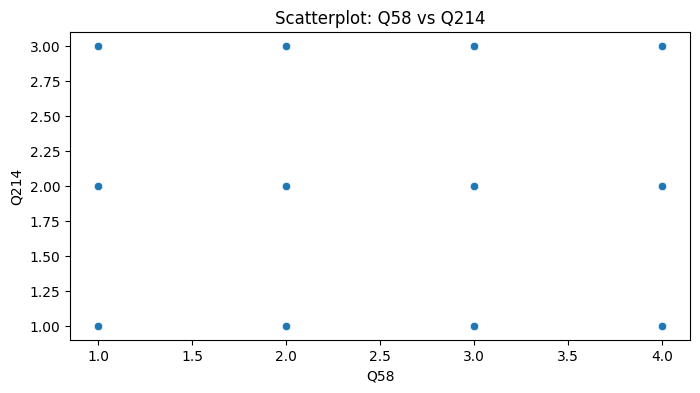

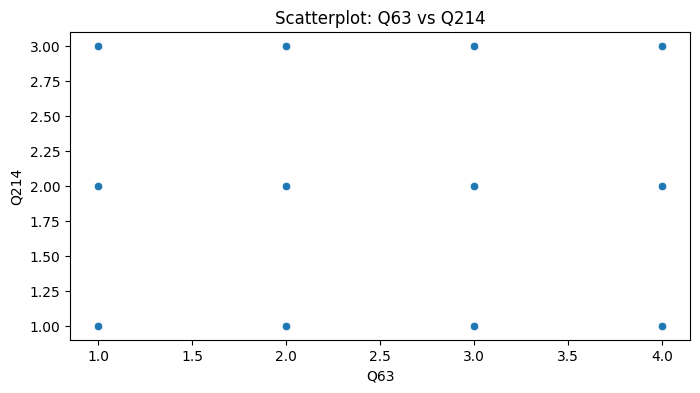

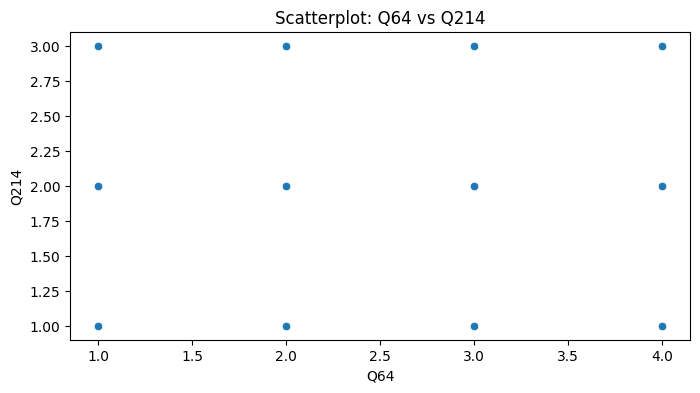

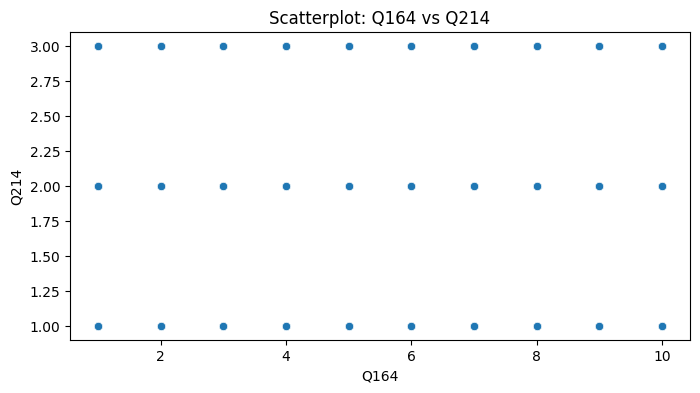

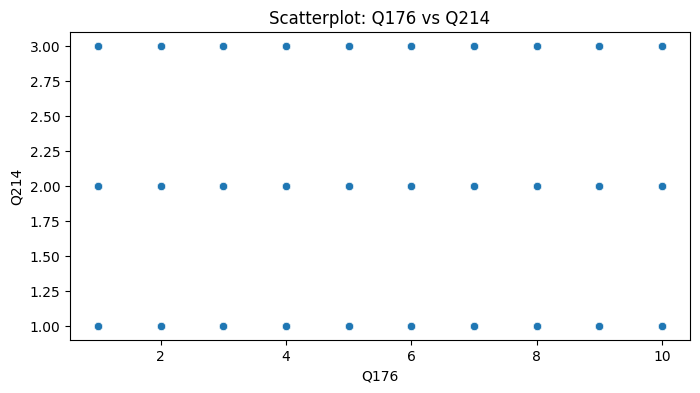

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'data/final_cleaned_data.csv'
df_cleaned = pd.read_csv(file_path)

# Step 1: Summary Statistics
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Step 2: Visualizations

# Histogram for ordinal variables
ordinal_vars = ['Q207', 'Q210', 'Q211', 'Q213', 'Q214', 'Q112', 'Q114', 'Q164', 'Q176']
for var in ordinal_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

# Bar plots for binary and multinomial variables
binary_vars = ['Q57', 'Q260', 'Q264', 'Q265']
multinomial_vars = ['Q58', 'Q63', 'Q64', 'Q198']
categorical_vars = binary_vars + multinomial_vars
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df_cleaned)
    plt.title(f"Count Plot of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap for numeric/ordinal variables
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[ordinal_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Ordinal Variables)")
plt.show()

# Step 3: Pairwise relationships (scatterplots) for trust and cultural values
trust_vars = ['Q207', 'Q210', 'Q211', 'Q213', 'Q214']  # Trust in institutions
cultural_vars = ['Q57', 'Q58', 'Q63', 'Q64', 'Q164', 'Q176']  # Cultural values
for trust_var in trust_vars:
    for cultural_var in cultural_vars:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df_cleaned[cultural_var], y=df_cleaned[trust_var])
        plt.title(f"Scatterplot: {cultural_var} vs {trust_var}")
        plt.xlabel(cultural_var)
        plt.ylabel(trust_var)
        plt.show()
